# Exercises on Laplace approximation in Rasmus Baath's blog

[Easy Laplace Approximation of Bayesian Models in R](http://www.sumsar.net/blog/2013/11/easy-laplace-approximation/)

### 1. Model: likelihood, prior, non normalized posterior

In [1]:
n1<-10
n0<-8
n<-n0+n1
Lik<-function(theta){theta^n1*(1-theta)^n0}
# Prior is uniform (constant = 1). 
# Joint coincides with Lik
# Non normalized posterior is equal to the Joint
nnh<-Lik

#### Laplace approximation

In [3]:
# q=log(Lik)
# Equating q'(theta)=0
mu<-n1/n
round(mu,4)
# 
# Derived as sigma2= 1/|q''(n1/n)|
sigma2<-n1*n0/n^3
round(sigma2,4)
sigma<-sqrt(sigma2)
round(sigma,4)

[1] 0.5556

[1] 0.0137

[1] 0.1171

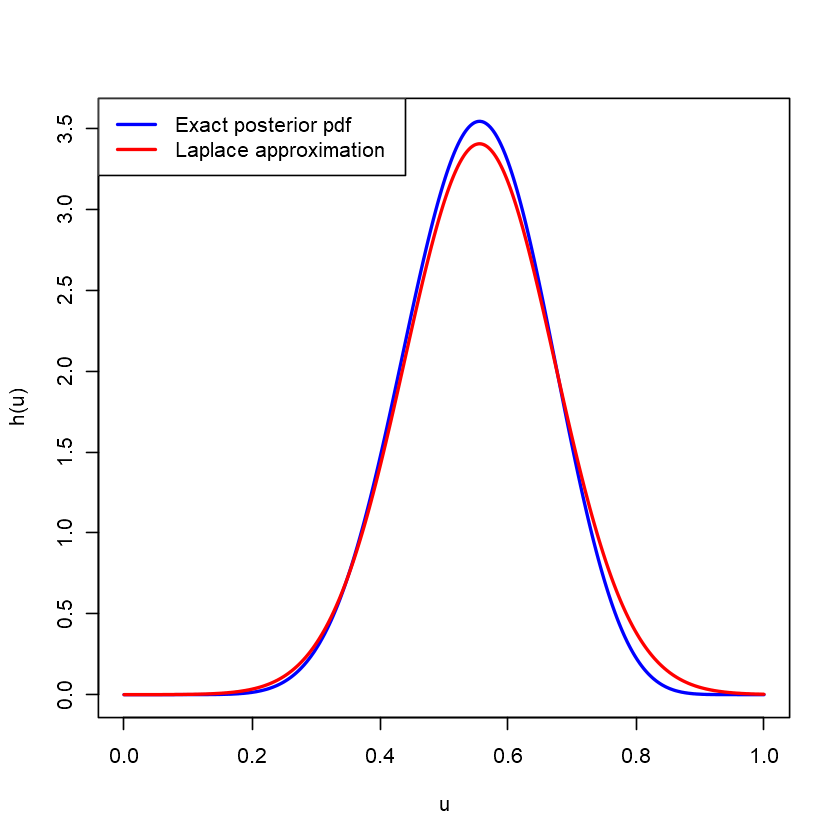

In [4]:
Z<-integrate(nnh,0,1)$value
h<-function(t){nnh(t)/Z}
u<-seq(0,1,length=500)
plot(u,h(u),"l",lwd=2,col="blue")
lines(u,dnorm(u,mean=mu,sd=sigma),col="red",lwd=2)
legend("topleft",lwd=2,legend=c("Exact posterior pdf","Laplace approximation"),col=c("blue","red"))

#### Repeat same Laplace approximation, now with number of heads $n_{1}=4$ and number of tails $n_{0}=2$

In [5]:
n1<-4
n0<-2
n<-n0+n1
Lik<-function(theta){theta^n1*(1-theta)^n0}
# Prior is uniform (constant = 1). 
# Joint coincides with Lik
# Non normalized posterior is equal to the Joint
nnh<-Lik

In [6]:
mu<-n1/n
round(mu,4)
sigma2<-n1*n0/n^3
round(sigma2,4)
sigma<-sqrt(sigma2)
round(sigma,4)

[1] 0.6667

[1] 0.037

[1] 0.1925

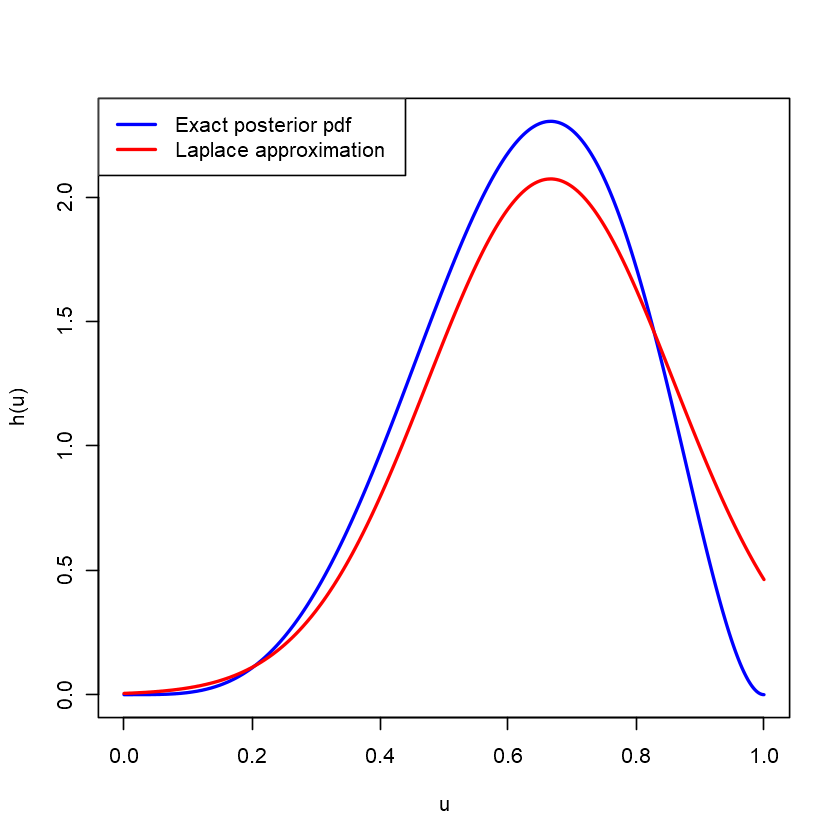

In [7]:
Z<-integrate(nnh,0,1)$value
h<-function(t){nnh(t)/Z}
u<-seq(0,1,length=500)
plot(u,h(u),"l",lwd=2,col="blue")
lines(u,dnorm(u,mean=mu,sd=sigma),col="red",lwd=2)
legend("topleft",lwd=2,legend=c("Exact posterior pdf","Laplace approximation"),col=c("blue","red"))

 ### 2. Normal data with a known $\mu$
 
Likelihood is normal with known $\mu$ and standard deviation $\sigma$.
Assume a flat prior for $\sigma$.
Posterior of the standard deviation $\sigma$, given 8 random numbers distributed as Normal(10, 4): 

In [2]:
mu<-10
n<-8
sigma.data.gen<-4
x<-rnorm(n = n, mean = mu, sd = sigma.data.gen)
## [1] 10.770  4.213  8.707 16.489  7.244 18.168 13.775 18.328
round(x,4) 

[1] 14.2118 14.1982  6.9159  7.8748 11.9069 13.8544 15.0513 14.7378

In [3]:
s2mu<-sum((x-mu)^2)/n
Laplace.Approx.mean<-s2mu
Laplace.Approx.sd<-sqrt(s2mu/(2*n))
round(c(Laplace.Approx.mean,Laplace.Approx.sd),4)

[1] 14.4811  0.9513

Exact posterior is:

$$
    h(\sigma\,|\,x)\propto \sigma^{-n}\cdot\big\{-\dfrac{n\,s^2(\mu)}{2\,\sigma^2}\big\}
$$